# Data Science Case Study (A/B Test)

## Analyze and Present A/B Test Results
Facebook recently introduced a new bidding type, “average bidding”, as an alternative to its exisiting bidding
type, called “maximum bidding”. One of our clients, HotelsForYou.com, has decided to test this new feature
and wants to conduct an A/B test to understand if average bidding brings more conversions than maximum
bidding.

In this A/B test, HotelsForYou.com randomly splits its audience into two equally sized groups, e.g. the test
and the control group. A Facebook ad campaign with “maximum bidding” is served to “control group” and
another campaign with “average bidding” is served to the “test group”.

The A/B test has run for 1 month and HotelsForYou.com now expects you to analyze and present the results
of this A/B test.

## You should answer the following questions in your presentation:
1. How would you define the hypothesis of this A/B test?
2. Can we conclude statistically significant results?
3. Which statistical test did you use, and why?
4. Based on your answer to Question 2, what would be your recommendation to client?

## Hints:
1. Your presentation should last about 15 minutes, and should be presented in English.
2. The ultimate success metric for HotelsForYou.com is Number of Purchases. Therefore, you should focus
on Purchase metrics for statistical testing.
3. Explain the concept of statistical testing for a non-technical audience.
4. The customer journey for this campaign is:
    1. User sees an ad (Impression)
    2. User clicks on the website link on the ad (Website Click)
    3. User makes a search on the website (Search)
    4. User views details of a product (View Content)
    5. User adds the product to the cart (Add to Cart)
    6. User purchases the product (Purchase)
5. Use visualizations to compare test and control group metrics, such as Website Click Through Rate, Cost
per Action, and Conversion Rates in addition to Purchase numbers.
6. If you see trends, anomalies or other patterns, discuss these in your presentation.
7. You can make assumptions if needed.

## Appendix
- **Impressions:** The number of times an ad is displayed.
- **Reach:** The number of unique people who saw an ad.
- **Website Clicks:** The number of clicks on ad links directed to Advertiser’s website.
- **Website Click Through Rate:** Number of Website Clicks / Number of Impressions x 100
- **Cost per Action:** Spend / Number of Actions
- **Action:** Can be any conversion event, such as Search, View Content, Add to Cart and Purchase.
- **Conversion Rate:** Number of Actions / Number of Website Clicks x 100

# 1) Keşifci Veri Analizi & Veri Ön İşleme

In [117]:
import pandas as pd

control_grup  = pd.read_excel("Data_Science_Case_Study.xlsx",  sheet_name = "Control Group")
test_grup = pd.read_excel("Data_Science_Case_Study.xlsx",  sheet_name = "Test Group")

In [118]:
control_grup.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,Control Campaign,2017.01.02,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,Control Campaign,2017.01.03,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,Control Campaign,2017.01.04,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,Control Campaign,2017.01.05,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0


In [119]:
control_grup.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend [USD],30.0,2481.788026,270.352050,1723.719827,2321.526469,2499.630727,2648.65398,3105.836356
# of Impressions,29.0,114608.827586,18122.017690,68766.000000,100769.000000,118268.000000,125097.00000,146702.000000
Reach,29.0,87628.482759,15958.827440,49422.000000,75440.000000,86442.000000,97334.00000,121762.000000
# of Website Clicks,29.0,5150.896552,1432.388798,2244.000000,4247.000000,4975.000000,6387.00000,8139.000000
# of Searches,29.0,2016.758621,621.055303,931.000000,1657.000000,1969.000000,2282.00000,3262.000000
# of View Content,29.0,1546.310345,466.065990,500.000000,1220.000000,1541.000000,1898.00000,2559.000000
# of Add to Cart,29.0,1061.862069,429.345326,303.000000,715.000000,1013.000000,1455.00000,1959.000000
# of Purchase,29.0,507.379310,146.115027,217.000000,400.000000,484.000000,605.00000,799.000000


In [120]:
test_grup.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2017.01.01,2335.586267,160244,121551,8223,2989,2949,1371,913
1,Test Campaign,2017.01.02,2899.490621,100793,68241,4972,2162,1388,1253,510
2,Test Campaign,2017.01.03,3031.740149,89525,83450,3514,1365,1251,995,391
3,Test Campaign,2017.01.04,2794.847648,110122,89985,4411,1533,1134,951,434
4,Test Campaign,2017.01.05,2201.845423,122204,84000,5165,1582,1007,810,492


In [121]:
test_grup.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend [USD],30.0,2571.426085,298.015635,1974.357447,2344.072941,2641.858788,2807.265544,3091.272267
# of Impressions,30.0,110497.300000,21330.440083,73246.000000,99564.250000,108999.000000,122314.250000,160244.000000
Reach,30.0,88826.833333,21373.019568,53002.000000,71442.000000,86525.500000,104221.000000,137273.000000
# of Website Clicks,30.0,4863.866667,1178.616276,3086.000000,3991.250000,4910.000000,5471.000000,8223.000000
# of Searches,30.0,1862.433333,482.162706,1157.000000,1540.500000,1822.000000,2176.250000,2989.000000
# of View Content,30.0,1457.600000,484.110959,817.000000,1145.500000,1321.500000,1720.000000,2949.000000
# of Add to Cart,30.0,885.333333,270.609317,226.000000,687.500000,880.500000,1062.250000,1371.000000
# of Purchase,30.0,486.066667,125.648643,277.000000,410.000000,472.000000,549.000000,913.000000


In [122]:
control_grup = control_grup[["# of Purchase"]]
control_grup = control_grup.rename(columns = {'# of Purchase':'Control_Group'})
control_grup.head()

,Control_Group
0,383.0
1,644.0
2,639.0
3,649.0
4,455.0


In [123]:
control_grup.isnull().sum()

Control_Group    3
dtype: int64

In [124]:
control_grup.shape

(32, 1)

In [125]:
test_grup = test_grup[["# of Purchase"]]
test_grup = test_grup.rename(columns = {'# of Purchase':'Test_Group'})
test_grup.head()

,Test_Group
0,913
1,510
2,391
3,434
4,492


In [126]:
test_grup.isnull().sum()

Test_Group    0
dtype: int64

In [127]:
test_grup.shape

(30, 1)

In [128]:
control_grup = control_grup.iloc[0:30]
control_grup.head()

,Control_Group
0,383.0
1,644.0
2,639.0
3,649.0
4,455.0


In [129]:
control_grup.shape

(30, 1)

In [130]:
control_grup.isnull().sum()

Control_Group    1
dtype: int64

In [131]:
control_grup.fillna(control_grup.mean(), inplace = True)

In [132]:
control_grup = control_grup.astype(int)
print(control_grup.shape, test_grup.shape)

In [134]:
df = pd.concat([control_grup, test_grup], axis = 1)
df.head()

,Control_Group,Test_Group
0,383,913
1,644,510
2,639,391
3,649,434
4,455,492


In [135]:
df.shape

(30, 2)

# 2) Bağımsız İki Örneklem T Testi

**Hipotez :**

H0 : "Maximum Bidding" ile "Average Bidding" söz konusu olduğunda iki grubun satın alma miktarları ortalamaları arasında istatistiksel olarak anlamlı bir farklılık yoktur. (m1 = m2)

H1 : "Maximum Bidding" ile "Average Bidding" söz konusu olduğunda iki grubun satın alma miktarları ortalamaları arasında istatistiksel olarak anlamlı bir farklılık vardır. (m1 != m2)

**Hipotezlerin sonucu p_value değerine göre yorumlanmaktadır.**

- p-value < ise 0.05'ten HO RED.

- p-value < değilse 0.05'ten H0 REDDEDILEMEZ.

## 2.1) Varsayım Kontrolü
### a) Normallik Varsayımı (Shapiro Testi)

- H0 : Normal dağılım varsayımı sağlanmaktadır.

- H1 : Normal dağılım varsayımı sağlanmamaktadır.

#### 2.1.1) Control_Group için Normallik Varsayımı

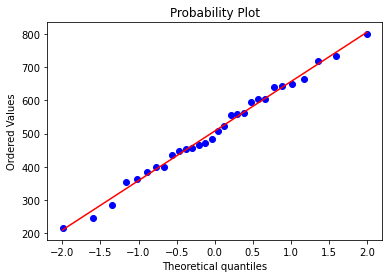

In [143]:
import scipy.stats as stats
import pylab
stats.probplot(df["Control_Group"], dist="norm", plot=pylab)
pylab.show()

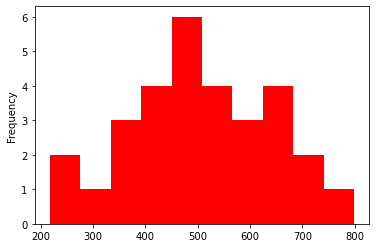

In [144]:
df["Control_Group"].plot.hist(color = "red");

In [141]:
from scipy.stats import shapiro
shapiro(df.Control_Group)

(0.9882097244262695, 0.9787935018539429)

**Yorum :** p_value =  0.9787 > 0.05 olduğu için H0 hipotezi **reddedilemedi.**  Maximum Bidding'in (Kontrol Grup) dağılımı normaldir.

#### 2.1.2) Test_Group için Normallik Varsayımı

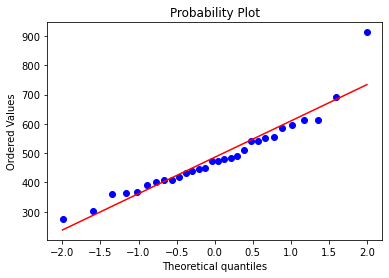

In [145]:
stats.probplot(df["Test_Group"], dist="norm", plot=pylab)
pylab.show()

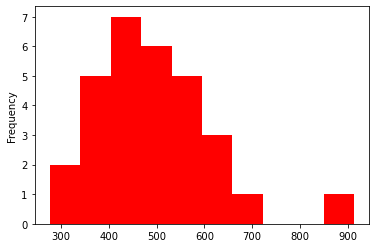

In [146]:
df["Test_Group"].plot.hist(color = "red");

In [112]:
shapiro(df.Test_Group)

(0.9188652038574219, 0.02506561577320099)

**Yorum:** p_value = 0.025 < 0.05 olduğu için H0 hiptotezi **reddedildi.** 
Average Bidding'in (Test Grup) dağılımı normal değildir.

### b). Varyans Homojenliği Varsayımı (Levene Testi)

H0 : Varyanslar homojendir.

H1 : Varyanslar homojen değildir.

In [356]:
stats.levene(df.Control_Group, df.Test_Group)

LeveneResult(statistic=1.4573242947259228, pvalue=0.23225655710383264)

**Yorum:** p_value = 0.2322 > 0.05 olduğu için H0 hipotezi **reddedilemez.**

## 3) Nonparametrik Bağımsız İki Örneklem Testi

Average Bidding (Test Grup) grubu normallik varsayımını sağlamadığı için NonParametrik Bağımsız İki Örneklem T Testi (Mannwhitneyu) uygulanmalıdır.

**Hipotez :**

H0 : "Maximum Bidding" ile "Average Bidding" söz konusu olduğunda iki grubun satın alma miktarları ortalamaları arasında istatistiksel olarak anlamlı bir farklılık yoktur. (m1 = m2)

H1 : "Maximum Bidding" ile "Average Bidding" söz konusu olduğunda iki grubun satın alma miktarları ortalamaları arasında istatistiksel olarak anlamlı bir farklılık vardır. (m1 != m2)

In [113]:
stats.mannwhitneyu(df.Control_Group, df.Test_Group)

MannwhitneyuResult(statistic=391.0, pvalue=0.19352350307853528)

**Yorum :** Nonparametrik Bağımsız İki Örneklerm T Testi sonucu çıkan p_value = 0.19 > 0.05 olduğu için H0 hipotezi **reddedilemedi.** Yani, Average Bidding ve Maximum Bidding sistemlerinin satın alma ortalamaları arasında istatistiksel olarak anlamlı bir farklılık yoktur.

# 4) Sonuç ve Değerlendirme

**1. Bu A/B testinin hipotezini nasıl tanımlarsınız?**

   **Hipotez:**
   
   - **H0 :** "Maximum Bidding" ile "Average Bidding" söz konusu olduğunda iki grubun satın alma miktarları ortalamaları arasında istatistiksel olarak anlamlı bir farklılık yoktur.
    
   - **H1 :** "Maximum Bidding" ile "Average Bidding" söz konusu olduğunda iki grubun satın alma miktarları ortalamaları arasında istatistiksel olarak anlamlı bir farklılık vardır.
   
**2. İstatistiksel olarak anlamlı sonuçlar çıkarabilir miyiz?**

   Test ve Kontrol grubu veri setini kullanarak gerçekleştirilen **Nonparametrik Bağımsız İki Örneklem T Testi** için p_value değeri 0.05'ten büyük olduğundan, "Maximum Bidding" ve
   "Average Bidding" metodları ile yapılan satın alma miktarları ortalamaları arasında istatistiksel olarak anlamlı bir farklılık olmadığı gözlemlenmiştir.

**3. Hangi istatistiksel testi kullandınız ve neden?**
    
   Nonparametrik Bağımsız İki Örneklem T Testi (Mannwihtneyu) istatistiksel metodu kullanılmıştır. Çünkü, yeni bir sistemin getirisi test edilmek isteniyor. Bunun için eşit gözlem
   sayılarını içeren eski sistemi kullanan Kontrol Grubu ve yeni sistemi kullanan Test Grubu ile kullanıcı davranışları inceleniyor ve birbirleri ile istatistiksel olarak
   kıyaslanıyor. Bu 2 grup birbirinden bağımsız farklı sistemleri kullanacağı için, Nonparametrik Bağımsız İki Örneklem T Testi kullanılmıştır. Nonparametrik Bağımsız İki Örneklem T Testi iki grup ortalaması arasında karşılaştırma yapmak istenildiğinde kullanılmaktadır.
    
**4. Soru 2'ye verdiğiniz cevabınıza dayanarak, müşteriye tavsiyeniz ne olurdu?**

   Bu test 30 gözlem birimi içeren veri setleri üzerinde yapılmıştır. Büyük Sayılar Yasası gereği, gözlem sayısı çoğaldıkça, yapılan testler gerçeğe en yakın sonuçları üretecektir. Bu
   nedenle eski ve yeni sistemlerin getirileri arasında istatistiksel olarak anlamlı bir farklılık çıkmadığı için, veri setindeki gözlem sayısını artırarak sistemleri bir süre daha
   incelemek iyi olabilecektir. Yani, her iki sistemdeki satın alma miktarlarının artması sağlanarak ve veri toplamaya devam edilerek, yeni veri setleri ile bu hipotez testinin 
   tekrarlanması, bize istatistiksel olarak anlamlı farklılık çıkartabilir bu sebeple bu  durum denenebilir.